In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline, AutoTokenizer # basic, autoTokinizer, DistilBertForSequenceClassifier, 

import plotly.graph_objects as go

import streamlit as st

import torch
import fire

import concurrent.futures
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

/Users/iffiness/.pyenv/versions/3.10.12/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Sentiment Analysis of Amazon Reviews
<!-- precision and recall of 0.916 -->
## Tools  
- Python
- Pytorch (_Deep Learning model_)
- Seaborn (_statistical visualizations_)
- NLTK (_Machine Learning and Text Analysis_)

Now this looks cleaner and more manageable.  
Now looking at the count of each rating.

shape: (3649999, 6)
Null values: column_0    2999999
column_1    3000025
column_2    2999999
column_3     649999
column_4     650187
column_5     649999
dtype: int64



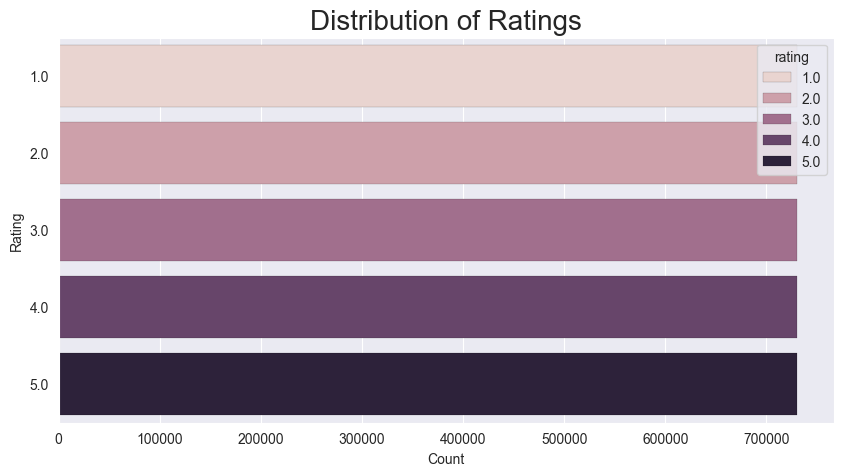

,sentiment,rating
0,mens ultrasheer This model may be ok for seden...,3.0
1,Surprisingly delightful This is a fast read fi...,4.0
2,"Works, but not as advertised I bought one of t...",2.0
3,Oh dear I was excited to find a book ostensibl...,2.0
4,"Incorrect disc! I am a big JVC fan, but I do n...",2.0
...,...,...
3649994,Don't do it!! The high chair looks great whe...,1.0
3649995,"Looks nice, low functionality I have used th...",2.0
3649996,"compact, but hard to clean We have a small h...",2.0
3649997,Hard to clean! I agree with everyone else wh...,3.0


In [3]:
from app_scripts.load_preprocess_data import load_data, preprocess_data, get_sentiment, plot_ratings

data = load_data()
# data = preprocess_data(data)
data = get_sentiment(data)
plot_ratings(data)
data

Seems like column_0 and column_3 are numeric columns while the others are text where either column_0 is populated or column_3 is.  
So I don't think it is far-fetched to merge the columns such that:
- column_0 and column_3 are a single column
- column_1, column_2, column_4, column_5 are the text columns

In [4]:
from app_scripts.model import huggingface_autoTokenizer, huggingFace_Distilbert

data = data.sample(frac =.009).reset_index(drop=True)
# data = data.sample(20).reset_index(drop=True)

data = huggingface_autoTokenizer(data)
data = huggingFace_Distilbert(data)
data.shape, data.sample(4)


,sentiment,rating,huggingface_autoTokenizer,huggingFace_Distilbert
0,Nice concept-lousy execution When it works it'...,2.0,Negative,2 stars
1,A Pleasure I bought this DVD primarily to ge...,4.0,Positive,4 stars
2,Not quite as advertised... If I could give h...,3.0,Neutral,3 stars
3,"motion eye,camera, problem all the reveiws i r...",4.0,Positive,4 stars
4,Only one year Everything was going fine unti...,1.0,Negative,1 star
...,...,...,...,...
3645,enjoyed it english is not my mother language...,4.0,Positive,3 stars
3646,Not completely worthless. If you want to take ...,2.0,Positive,1 star
3647,RIP OFF WOW.. this is such a rip off. Who pu...,1.0,Positive,1 star
3648,Warning: This is not an instrumental album. ...,2.0,Positive,2 stars


### TODO:
- Plot the ratings.
   - For each sentence, find the main topic of the text as in what the complain is talking about. 
- Interactively show what each point is mainly about. A scatter plot would be perfect to individually pick each point.
- Include a single value for a general rating for each single sentiment

In [5]:
display(data, data.shape)

,sentiment,rating,huggingface_autoTokenizer,huggingFace_Distilbert
0,Nice concept-lousy execution When it works it'...,2.0,Negative,2 stars
1,A Pleasure I bought this DVD primarily to ge...,4.0,Positive,4 stars
2,Not quite as advertised... If I could give h...,3.0,Neutral,3 stars
3,"motion eye,camera, problem all the reveiws i r...",4.0,Positive,4 stars
4,Only one year Everything was going fine unti...,1.0,Negative,1 star
...,...,...,...,...
3645,enjoyed it english is not my mother language...,4.0,Positive,3 stars
3646,Not completely worthless. If you want to take ...,2.0,Positive,1 star
3647,RIP OFF WOW.. this is such a rip off. Who pu...,1.0,Positive,1 star
3648,Warning: This is not an instrumental album. ...,2.0,Positive,2 stars


(3650, 4)

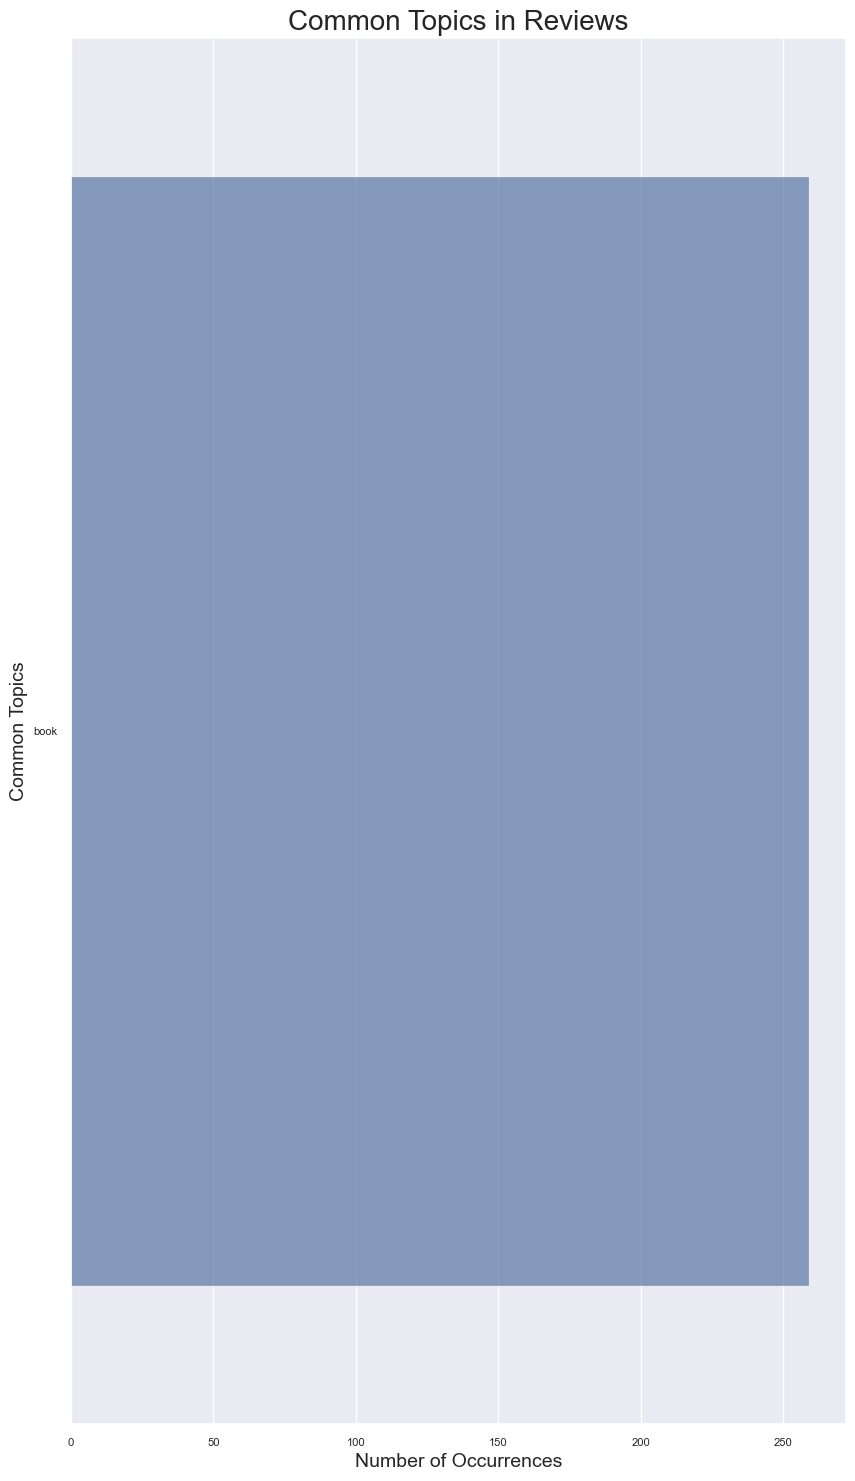

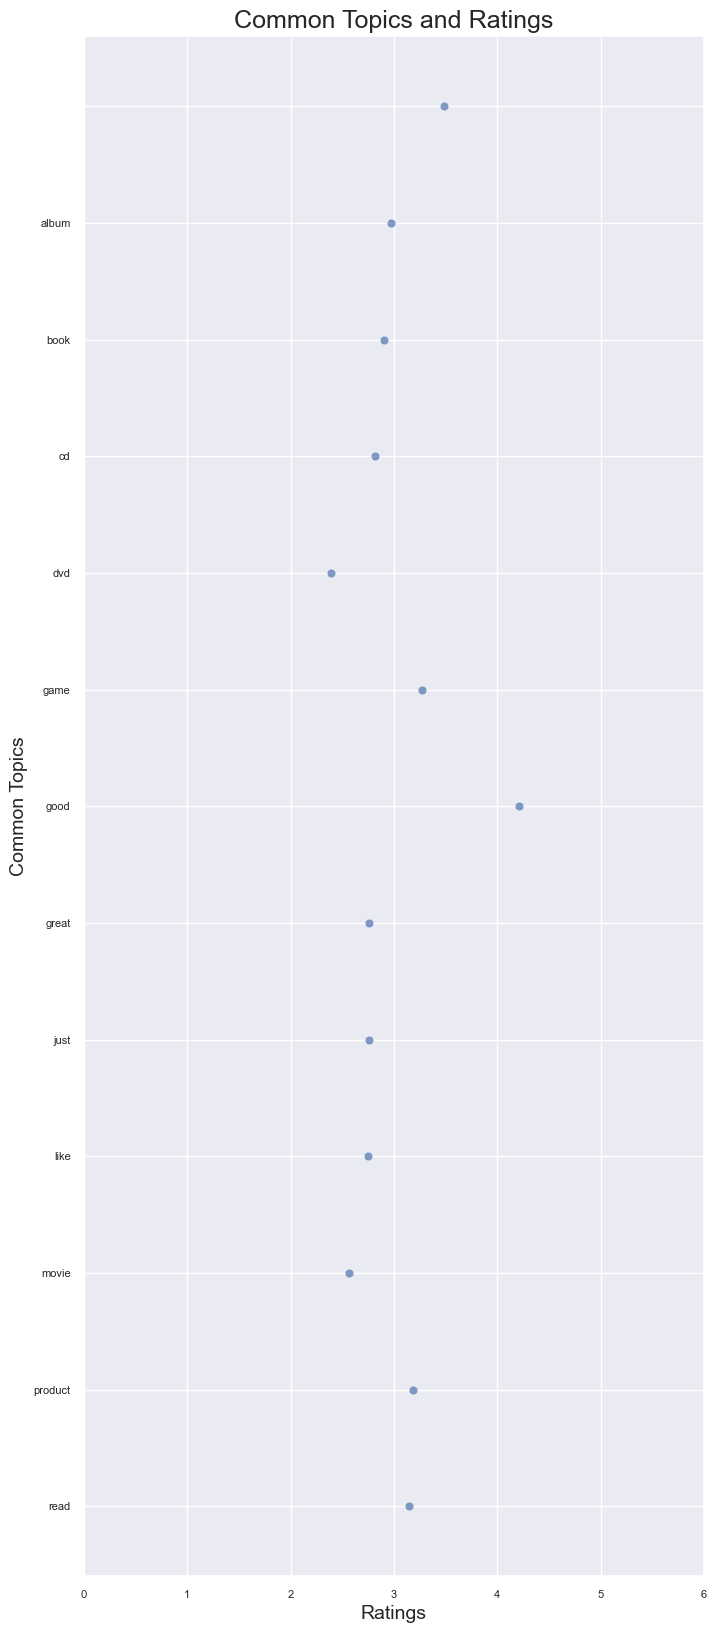

In [6]:
from app_scripts.topic_modelling import get_topics, get_common_topics, plot_topic_repetitions, plot_topic_vs_ratings
import pandas as pd

data = get_topics(data)
data = get_common_topics(data)

plot_topic_repetitions(data)
plot_topic_vs_ratings(data)


In [7]:
from app_scripts.topic_modelling import plot_interactive_ratings

plot_interactive_ratings(data)

data.sample(10)

,sentiment,rating,huggingface_autoTokenizer,huggingFace_Distilbert,top_words_lda,top_words_nmf,top_words_svd,common_topics
2383,"Moral issues aside, hasn't anyone noticed th...",2.0,Negative,2 stars,"just, film, wasn","just, issues, wasn","just, film, character",just
2932,FATTY adapter. It works. (Will not work for ...,2.0,Neutral,3 stars,"yes, height, mouse","adapter, usb, plug","plug, usb, adapter",adapter
1535,Throw away your old flashlights! I can't ima...,5.0,Positive,5 stars,"wrote, version, brighter","flashlight, defective, future","flashlight, defective, wrote",flashlight
16,This could be a much better book I am curren...,2.0,Neutral,3 stars,"ve, macrons, better","book, latin, using","book, latin, using",book
1213,Still functioning well after 6+ years This H...,4.0,Positive,4 stars,"like, job, watching","monitor, years, desktop","monitor, 2005, computer",monitor
3197,What good is something that keeps breaking? ...,1.0,Negative,1 star,"years, working, luck","bought, loud, pretty","bought, bad, filters",bought
1701,JAH JAH The best reggae cd ever made!! In my o...,5.0,Positive,5 stars,"jah, cd, zion","cd, float, jah","jah, cd, 420",cd
92,This group stinks! Why won't they go away? I...,1.0,Neutral,1 star,"won, dead, voices","backstreet, boys, ballads","backstreet, boys, just",backstreet
2063,Ok- An extra star because it looked nice on ...,2.0,Negative,2 stars,"timer, ve, buzzer","timer, buzzer, ve","timer, ve, buzzer",timer
2561,First two chapters of Harpo Speaks. I absolute...,3.0,Negative,4 stars,"book, harpo, speaks","book, harpo, speaks","book, harpo, speaks",book


In [8]:
# - Interactively show what each point is mainly about. A scatter plot would be perfect to individually pick each point.
import plotly.graph_objects as go

def plot_interactive_ratings(data):
    max_ratings_by_topic = data[data.common_topics.isin(data.common_topics.value_counts()[data.common_topics.value_counts() > 10].index)].groupby('common_topics')['rating'].mean().reset_index()
    
    # Create a scatter plot
    fig = go.Figure(data=go.Scatter(
        x=max_ratings_by_topic['rating'],  # Use the ratings as x-values
        y=max_ratings_by_topic['common_topics'],  # Use the common_topics as y-values
        mode='markers',  # Set the mode to markers for a scatter plot
        marker=dict(
            color=max_ratings_by_topic['rating'],  # Color the markers based on the ratings
            # colorscale='turbo',  # Choose a color scale
            # colorbar=dict(title='Ratings'),  # Add a color bar with a title
            size=10  # Set the marker size
        )
    ))
    
    # Customize the layout
    fig.update_layout(
        title='Common Topics and Average Ratings',  # Add a title
        xaxis_title='Ratings',  # Label the x-axis
        yaxis_title='Common Topics',  # Label the y-axis
        font=dict(size=10),  # Set the font size
        height=1000,  # Set the height of the plot
    )

    fig.update_yaxes(automargin=True)
    
    # Show the interactive scatter plot
    fig.show()

# plot_interactive_ratings(data)

In [19]:
!git lfs track "assets/data.csv"

OMP: Warning #191: Forking a process while a parallel region is active is potentially unsafe.


Tracking "assets/data.csv"


In [14]:
import streamlit as st

from app_scripts.load_preprocess_data import load_data, preprocess_data, get_sentiment, plot_ratings
from app_scripts.model import huggingface_autoTokenizer, huggingFace_Distilbert
from app_scripts.topic_modelling import get_topics, get_common_topics , plot_topic_repetitions, plot_topic_vs_ratings, plot_interactive_ratings

st.title('Sentiment Analysis of Amazon Reviews')
st.write('This app analyzes the sentiment of Amazon reviews')

st.write('The data used in this app is from the [Amazon Review Data (2018)](https://nijianmo.github.io/amazon/index.html) by Jianmo Ni, UCSD')

st.write('The model used in this app is the [DistilBERT](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) model by Hugging Face')
st.write('The model used in this app is the [AutoTokenizer](https://huggingface.co/transformers/model_doc/auto.html) model by Hugging Face')

st.write('The topic modelling used in this app is the [Latent Dirichlet Allocation (LDA)](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) model by David M. Blei, Andrew Y. Ng, Michael I. Jordan')
st.write('The topic modelling used in this app is the [Non-negative Matrix Factorization (NMF)](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) model by Daniel D. Lee, H. Sebastian Seung')
st.write('The topic modelling used is the [Truncated Singular Value Decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) model by Paul G. Constantine, David F. Gleich, Paul W. Mahoney')

# st.write('The interactive plots used in this app is created using [Plotly](https://plotly.com/python/) library')

inputText, inputRatings = st.text_input('Enter a review'), st.slider('Enter a rating', 1, 5)
if inputText and inputRatings:
    st.write(f'The review you entered is "{inputText}" and the rating you entered is {inputRatings}')

# @st.cache_data
def get_data():
    data1 = load_data()
    data1 = get_sentiment(data1.sample(frac=.008).reset_index(drop=True))

    data2 = load_data(inputText=inputText, inputRating=inputRatings)

    # Join data1 and data2
    data = pd.concat([data1, data2], axis=0).reset_index(drop=True)
    display(data, data.shape)

    # data = get_sentiment(data)

    data = huggingface_autoTokenizer(data)
    data = huggingFace_Distilbert(data)
    
    return data

if st.button('Analyze'):
    data = get_data()
    data = get_topics(data)
    data = get_common_topics(data)

    plot_topic_repetitions(data)
    plot_topic_vs_ratings(data)
    plot_interactive_ratings(data)

    st.write(data.sample(4))


shape: (3649999, 6)
Null values: column_0    2999999
column_1    3000025
column_2    2999999
column_3     649999
column_4     650187
column_5     649999
dtype: int64

shape: (3649999, 6)
Null values: column_0    2999999
column_1    3000025
column_2    2999999
column_3     649999
column_4     650187
column_5     649999
dtype: int64



,sentiment,rating,column_0,column_1,column_2,column_3,column_4,column_5
0,A New Look-insightful and helpful Quite a diff...,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,poor quality and function This product perfo...,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Big let down I sure was let down by this one...,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,"Waste Of Film This is a waste of film , time...",1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Inaccurate--unacceptable I gave these 1 star...,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3679194,NaN,NaN,NaN,NaN,NaN,1.0,Don't do it!!,The high chair looks great when it first comes...
3679195,NaN,NaN,NaN,NaN,NaN,2.0,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3679196,NaN,NaN,NaN,NaN,NaN,2.0,"compact, but hard to clean","We have a small house, and really wanted two o..."
3679197,NaN,NaN,NaN,NaN,NaN,3.0,Hard to clean!,I agree with everyone else who says this chair...


(3679199, 8)

KeyboardInterrupt: 